In [81]:
import pandas as pd
import geopandas as gpd

In [128]:
#Alternative: LoAD PLUTO Shapefile
# PLUTOshp=gpd.read_file('Data\mappluto_22v2_shp\MapPLUTO.shp')


In [82]:
#Load PLUTO CSV
PLUTOcsv=pd.read_csv('Data\mappluto_22v2_shp\CSV\pluto_22v3.csv')

c:\ProgramData\Miniconda3\envs\testv37\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (21,22,24,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [83]:
PLUTOcsv.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

In [84]:
PLUTOcsv.bldgclass=PLUTOcsv.bldgclass.astype(str)

In [85]:
#get percentage of residential vs com,mercial vs others. 
#First convert the buildingtypes into commercial and residential
PLUTOcsv

bldgGroup=[]
for i in PLUTOcsv.bldgclass:
    if i.startswith('A') | i.startswith('B') | i.startswith('C') | i.startswith('D') | i.startswith('L') | i.startswith('N')|i.startswith('S'):
        bldgGroup.append('Residential')
    elif i.startswith('E') | i.startswith('F') | i.startswith('G') | i.startswith('H') | i.startswith('I') | i.startswith('J')|i.startswith('K')|i.startswith('O')|i.startswith('P')| i.startswith('T')|i.startswith('U')|i.startswith('W')|i.startswith('Y'):
        bldgGroup.append('Commercial')
    else: 
        bldgGroup.append('other')
PLUTOcsv['bldgGroup']=bldgGroup
PLUTOcsv

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes,bldgGroup
0,MN,574,65,102.0,1006300.0,1.006300e+10,63.0,2001.0,2.0,3.0,...,NaN,1,NaN,NaN,22v3,t,40.734448,-73.997330,NaN,Residential
1,BK,3435,45,304.0,3041100.0,3.041100e+10,411.0,1000.0,32.0,37.0,...,NaN,1,NaN,NaN,22v3,NaN,40.688820,-73.906684,NaN,Residential
2,BK,3447,29,304.0,3041100.0,3.041100e+10,411.0,1002.0,32.0,37.0,...,NaN,1,NaN,NaN,22v3,NaN,40.688377,-73.905239,NaN,Residential
3,BX,2514,10,204.0,2019300.0,2.019300e+10,193.0,4001.0,9.0,8.0,...,NaN,1,NaN,NaN,22v3,NaN,40.834979,-73.927858,NaN,Residential
4,MN,482,7501,102.0,1004500.0,1.004500e+10,45.0,1006.0,2.0,1.0,...,08/25/1988,1,NaN,NaN,22v3,NaN,40.721202,-73.997742,NaN,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858614,BK,739,42,307.0,3009600.0,3.009600e+10,96.0,4000.0,15.0,38.0,...,NaN,1,NaN,NaN,22v3,NaN,40.646973,-74.005167,NaN,Residential
858615,BK,3435,21,304.0,3041100.0,3.041100e+10,411.0,1000.0,32.0,37.0,...,NaN,1,NaN,NaN,22v3,NaN,40.689122,-73.906846,NaN,Residential
858616,BK,3435,24,304.0,3041100.0,3.041100e+10,411.0,1000.0,32.0,37.0,...,NaN,1,NaN,NaN,22v3,NaN,40.689246,-73.906727,NaN,Residential
858617,BK,3441,17,304.0,3041100.0,3.041100e+10,411.0,1001.0,32.0,37.0,...,NaN,1,NaN,NaN,22v3,NaN,40.688466,-73.906317,NaN,Residential


In [127]:
PLUTOcsv.dtypes

borough            object
block               int64
lot                 int64
cd                float64
bct2020           float64
                   ...   
notes             float64
bldgGroup          object
bldgGroupRes       object
bldgGroupCom       object
bldgGroupOther     object
Length: 96, dtype: object

In [92]:
#Filter out resdiential usages. 
PLUTOcsv['bldgGroupRes'] = PLUTOcsv['bldgGroup'].mask(PLUTOcsv['bldgGroup'].ne('Residential'))
PLUTOcsv['bldgGroupCom'] = PLUTOcsv['bldgGroup'].mask(PLUTOcsv['bldgGroup'].ne('Commercial'))
PLUTOcsv['bldgGroupOther'] = PLUTOcsv['bldgGroup'].mask(PLUTOcsv['bldgGroup'].ne('other'))


In [103]:
#Count Amount of Residential Buildings per Census zone
ResdidentialOccurences=PLUTOcsv.groupby(['ct2010'])['bldgGroupRes'].count()
CommercialOccurences=PLUTOcsv.groupby(['ct2010'])['bldgGroupCom'].count()
OtherOccurences=PLUTOcsv.groupby(['ct2010'])['bldgGroupOther'].count()
totalBuildings=PLUTOcsv.groupby(['ct2010'])['bldgGroup'].count()

In [106]:
PercentagesUsage=pd.DataFrame()
PercentagesUsage['ResdidentialOccurences']=ResdidentialOccurences
PercentagesUsage['CommercialOccurences']=CommercialOccurences
PercentagesUsage['OtherOccurences']=OtherOccurences
PercentagesUsage['totalBuildings']=totalBuildings

PercentagesUsage['PercentRes']=PercentagesUsage['ResdidentialOccurences']/PercentagesUsage['totalBuildings']
PercentagesUsage['PercentCom']=PercentagesUsage['CommercialOccurences']/PercentagesUsage['totalBuildings']
PercentagesUsage['PercentOther']=PercentagesUsage['OtherOccurences']/PercentagesUsage['totalBuildings']
PercentagesUsage

,ResdidentialOccurences,CommercialOccurences,OtherOccurences,totalBuildings,PercentRes,PercentCom,PercentOther
ct2010,,,,,,,
1.00,212,160,91,463,0.457883,0.345572,0.196544
2.00,1387,199,111,1697,0.817325,0.117266,0.065410
2.01,29,8,7,44,0.659091,0.181818,0.159091
2.02,24,18,13,55,0.436364,0.327273,0.236364
3.00,63,69,43,175,0.360000,0.394286,0.245714
...,...,...,...,...,...,...,...
1579.02,1066,37,9,1112,0.958633,0.033273,0.008094
1579.03,1104,47,28,1179,0.936387,0.039864,0.023749
1617.00,1295,29,59,1383,0.936370,0.020969,0.042661


In [47]:
#Gets the prevailing buildingclass per zipcode. Useless, as too many different classes.
# PLUTOctLanduseCount=PLUTOcsv.groupby(by='ct2010')['bldgclass'].agg(pd.Series.mode).to_frame()


In [49]:
#Load in Census Blocks. 
#Load in PLUTo Bldgs
#join both on census block ID
#Groupby census blocks, count building class.  

<AxesSubplot:>

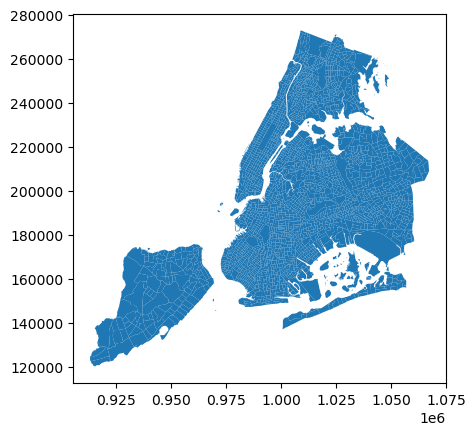

In [107]:
#Load Census tracts
CensusTracts=gpd.read_file('Data\CensusBlocksAvgValues\CensusZones_Result.shp')
CensusTracts.plot()

In [108]:
#Transform CTLabel to float
CensusTracts.CTLabel=CensusTracts.CTLabel.astype(float)

In [121]:
#Merge with  PercentagesUsage to be able to plot the percentages
CensusTracts_LanduseCount=CensusTracts.merge(PercentagesUsage[['PercentRes','PercentCom','PercentOther']],left_on='CTLabel',right_on='ct2010', how='left')

In [122]:
CensusTracts_LanduseCount

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,...,Shape_Leng,Shape_Area,_Temperatu,EVI_mean,BldgVolume,BldgDensit,geometry,PercentRes,PercentCom,PercentOther
0,1.00,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),...,11023.048501,1.844421e+06,18.560054,0.196867,3049655.519,17.798,"MULTIPOLYGON (((972081.788 190733.467, 972184....",0.457883,0.345572,0.196544
1,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,4754.495244,9.723122e+05,23.679450,0.125634,1936551.655,21.438,"POLYGON ((988548.218 197770.375, 987978.808 19...",0.659091,0.181818,0.159091
2,6.00,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,6976.286456,2.582705e+06,22.304575,0.108505,7281368.279,30.346,"POLYGON ((986961.185 199553.643, 987206.139 19...",0.849779,0.078792,0.071429
3,14.01,1,Manhattan,001401,1001401,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,5075.332000,1.006117e+06,22.808815,0.159888,1876774.510,20.078,"POLYGON ((987475.016 200297.218, 987705.443 20...",0.363636,0.181818,0.454545
4,14.02,1,Manhattan,001402,1001402,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,4459.156019,1.226206e+06,23.393524,0.063903,4594905.509,40.335,"POLYGON ((988387.669 201258.312, 988621.002 20...",0.715909,0.181818,0.102273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,769.02,4,Queens,076902,4076902,None,Forest Hills,QN0602,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,4439.452601,1.097829e+06,25.669474,0.134916,1181982.500,11.589,"POLYGON ((1030973.048 199652.912, 1031028.511 ...",0.855556,0.111111,0.033333
2321,299.00,4,Queens,029900,4029900,None,St. Michael's Cemetery,QN0171,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),...,8656.463045,4.388717e+06,26.522752,0.437787,1198702.265,2.940,"POLYGON ((1011767.648 218808.178, 1013030.199 ...",0.566351,0.284360,0.149289
2322,317.00,4,Queens,031700,4031700,None,Astoria (North)-Ditmars-Steinway,QN0101,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),...,16879.120326,8.247619e+06,26.849144,0.164457,3567693.228,4.656,"POLYGON ((1014016.814 222524.557, 1014022.338 ...",0.920193,0.039903,0.039903
2323,792.01,3,Brooklyn,079201,3079201,None,Flatbush,BK1401,BK14,BK14 Flatbush-Midwood (CD 14 Approximation),...,4364.052319,1.170146e+06,26.662757,0.058608,1625266.209,14.950,"POLYGON ((996870.191 173500.937, 996601.396 17...",NaN,NaN,NaN


<AxesSubplot:>

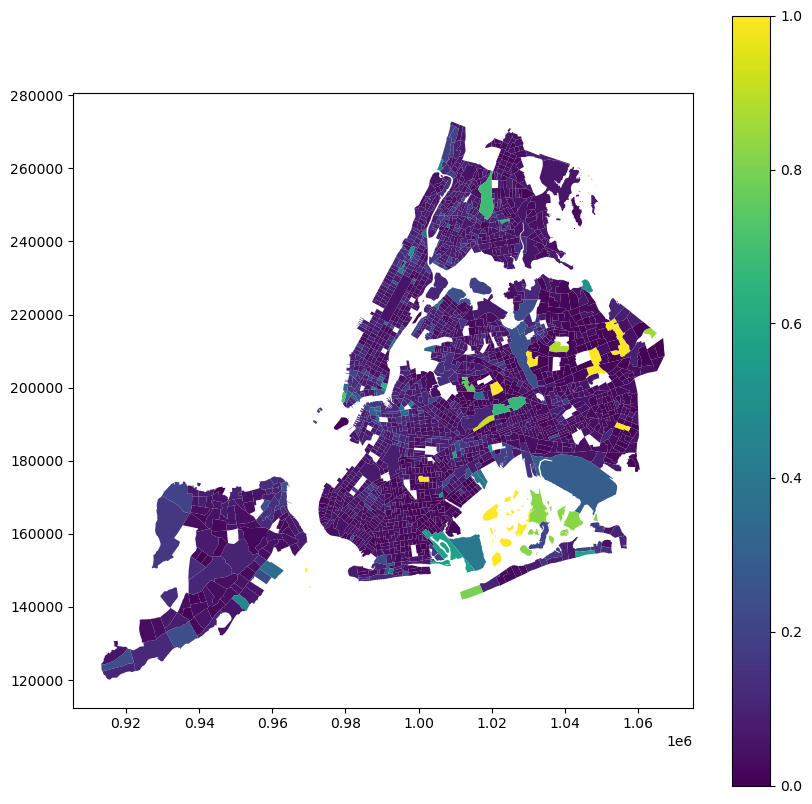

In [123]:
CensusTracts_LanduseCount.plot(column='PercentOther',figsize=(10,10),legend=True)

In [116]:
CensusTracts_LanduseCount.to_file("Data/CensusTracts_LanduseCount/CensusTracts_LanduseCount.shp")

c:\ProgramData\Miniconda3\envs\testv37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.
